# Example of SSI data parsing and ploting

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from ssi import SSI

In [2]:
# Python ISIS3-SSI object parser
img = SSI('5126r_cal.pho.cub')

img

<SSI> Cube: 5126r_cal
 - Size: (800, 800)
 - Start time: 1996-06-28 01:43:22
 - Filter name: CLEAR
 - Exposure: 0.00417 seconds
 - Main target: EUROPA
 - Data alignment: False

In [3]:
help(img)

Help on SSI in module ssi.ssi object:

class SSI(ssi.isis.isis.ISISCube)
 |  Galileo Solid State Image System ISIS3 object.
 |  
 |  Parameters
 |  ----------
 |  filename: str
 |      Input SSI filename.
 |  align: bool, optional
 |      Enable data auto-alignment.
 |  offset_s: int, optional
 |      Provide sample offset to apply to the data.
 |  offset_l: int, optional
 |      Provide line offset to apply to the data.
 |  
 |  Method resolution order:
 |      SSI
 |      ssi.isis.isis.ISISCube
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, val)
 |      Return data array based on value name or index.
 |  
 |  __init__(self, filename, align=False, offset_s=None, offset_l=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  alignment(self, align=True, offset_s=None, offset_l=None)
 |      Align navigation data on the I/F

In [4]:
# Image size
img.size

(800, 800)

In [5]:
# Filter name
img.filter_name

'CLEAR'

In [6]:
# Target name
img.target_name

'EUROPA'

In [7]:
# List of layers in the cube
img.layers

['CLEAR',
 'Phase Angle',
 'Emission Angle',
 'Incidence Angle',
 'Latitude',
 'Longitude',
 'Pixel Resolution']

In [8]:
# Main data image (first band).
img.data

array([[       nan,        nan, 0.6616845 , ..., 0.01874097, 0.02330439,
        0.01920273],
       [       nan,        nan, 0.5667658 , ..., 0.64417607, 0.64331275,
        0.62484866],
       [       nan,        nan, 0.5833956 , ..., 0.64018035, 0.6447313 ,
        0.6334495 ],
       ...,
       [       nan, 0.78587395, 0.796514  , ..., 0.5145454 , 0.48593405,
        0.48256457],
       [1.0838959 , 0.84181863, 0.76158404, ..., 0.46052158, 0.44188383,
        0.44267857],
       [5.486526  , 0.772195  , 0.7204898 , ...,        nan,        nan,
               nan]], dtype=float32)

In [9]:
# Layer can be query as a string
img['CLEAR']

array([[       nan,        nan, 0.6616845 , ..., 0.01874097, 0.02330439,
        0.01920273],
       [       nan,        nan, 0.5667658 , ..., 0.64417607, 0.64331275,
        0.62484866],
       [       nan,        nan, 0.5833956 , ..., 0.64018035, 0.6447313 ,
        0.6334495 ],
       ...,
       [       nan, 0.78587395, 0.796514  , ..., 0.5145454 , 0.48593405,
        0.48256457],
       [1.0838959 , 0.84181863, 0.76158404, ..., 0.46052158, 0.44188383,
        0.44267857],
       [5.486526  , 0.772195  , 0.7204898 , ...,        nan,        nan,
               nan]], dtype=float32)

In [10]:
# West longitude (degree)
img['Longitude']

array([[ 98.29574 ,  98.36171 ,  98.42755 , ..., 139.01155 , 139.06586 ,
        139.1202  ],
       [ 98.34264 ,  98.4086  ,  98.47442 , ..., 139.05428 , 139.10857 ,
        139.16289 ],
       [ 98.389496,  98.45543 ,  98.52123 , ..., 139.09695 , 139.15123 ,
        139.20555 ],
       ...,
       [120.84485 , 121.041824, 121.23369 , ..., 167.77127 , 167.8211  ,
        167.87096 ],
       [120.79142 , 120.99245 , 121.18805 , ..., 167.81317 , 167.863   ,
        167.91286 ],
       [120.734634, 120.939995, 121.13958 , ..., 167.85513 , 167.90497 ,
        167.95483 ]], dtype=float32)

In [11]:
# Incidence, emergence, phase angles, longitude, latitude and pixel resolution have shortcuts
img.lon

array([[261.70425, 261.6383 , 261.57245, ..., 220.98845, 220.93414,
        220.8798 ],
       [261.65735, 261.5914 , 261.52557, ..., 220.94572, 220.89143,
        220.83711],
       [261.6105 , 261.54456, 261.47876, ..., 220.90305, 220.84877,
        220.79445],
       ...,
       [239.15515, 238.95818, 238.76631, ..., 192.22873, 192.1789 ,
        192.12904],
       [239.20859, 239.00755, 238.81195, ..., 192.18683, 192.137  ,
        192.08714],
       [239.26537, 239.06   , 238.86041, ..., 192.14487, 192.09503,
        192.04517]], dtype=float32)

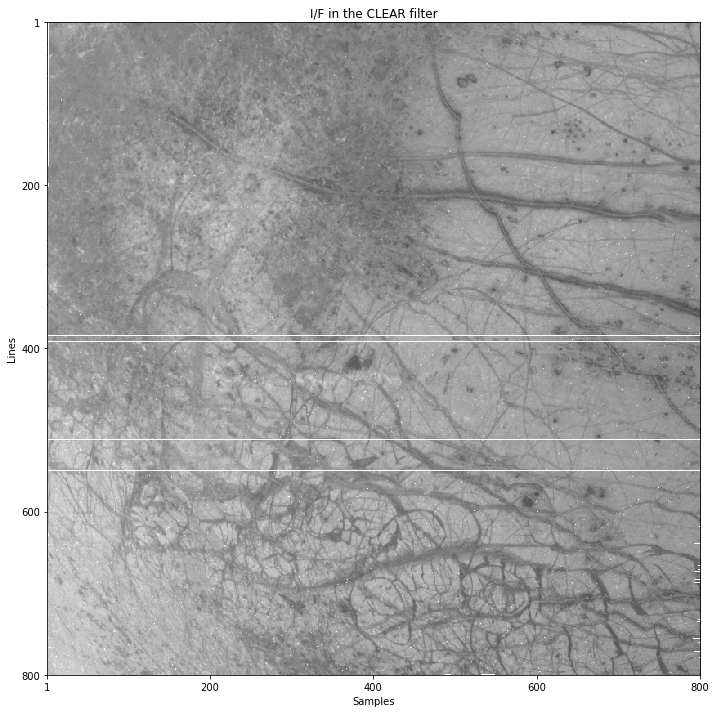

In [12]:
# Plot the image with ticks and lables
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

ax.imshow(img.data, extent=img.extent, cmap='gray', vmin=0, vmax=1)

ax.set_title(f'I/F in the {img.filter_name} filter')

ax.set_xticks(img.sticks)
ax.set_yticks(img.lticks)

ax.set_xlabel(img.slabel)
ax.set_ylabel(img.llabel);

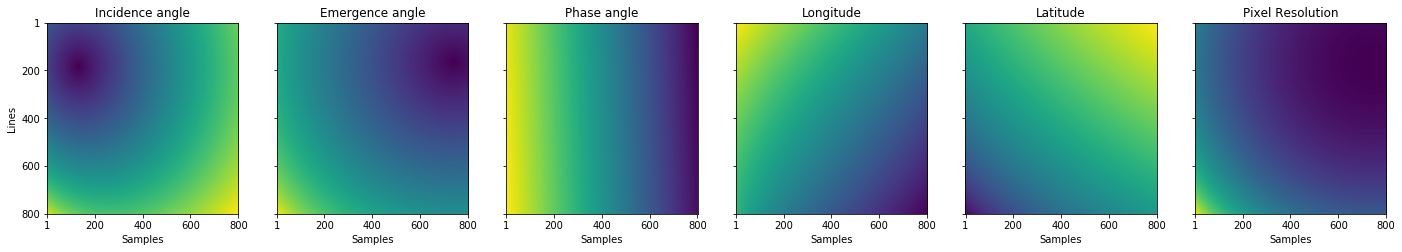

In [13]:
# Plot all the planes
fig, axes = plt.subplots(1, 6, figsize=(24, 4), sharey=True)

axes[0].imshow(img.inc, extent=img.extent)
axes[1].imshow(img.emi, extent=img.extent)
axes[2].imshow(img.phase, extent=img.extent)
axes[3].imshow(img.lon, extent=img.extent)
axes[4].imshow(img.lat, extent=img.extent)
axes[5].imshow(img.res, extent=img.extent)

axes[0].set_title('Incidence angle')
axes[1].set_title('Emergence angle')
axes[2].set_title('Phase angle')
axes[3].set_title('Longitude')
axes[4].set_title('Latitude')
axes[5].set_title('Pixel Resolution')

for ax in axes:
    ax.set_xticks(img.sticks)
    ax.set_yticks(img.lticks)
    ax.set_xlabel(img.slabel)
    
axes[0].set_ylabel(img.llabel);

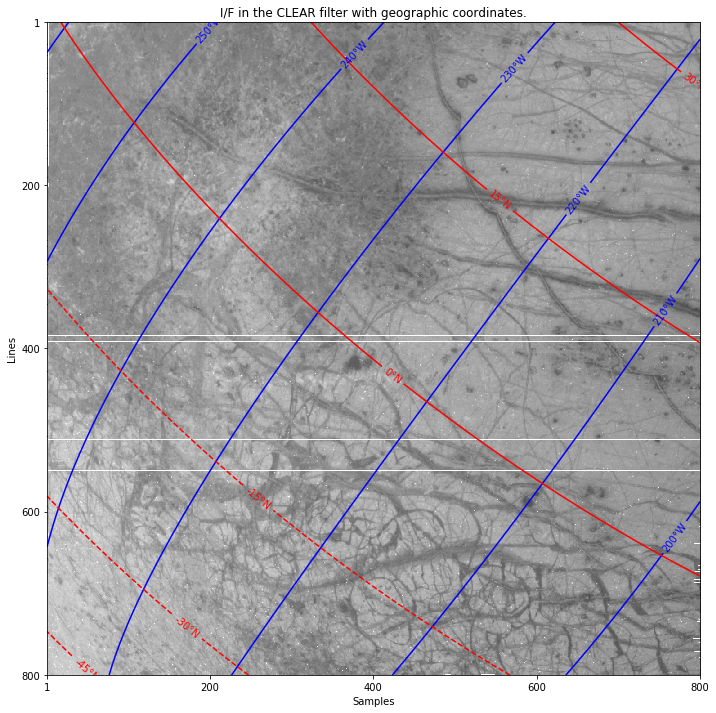

In [14]:
# Plot geographic coordinates
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

ax.imshow(img.data, extent=img.extent, cmap='gray', vmin=0, vmax=1)
clon = ax.contour(img.lon, np.arange(0, 360, 10), extent=img.cextent, colors='b')
clat = ax.contour(img.lat, np.arange(-45, 45, 15), extent=img.cextent, colors='r')

plt.clabel(clon, inline=True, fmt='%.0f°W')
plt.clabel(clat, inline=True, fmt='%.0f°N')

ax.set_title(f'I/F in the {img.filter_name} filter with geographic coordinates.')

ax.set_xticks(img.sticks)
ax.set_yticks(img.lticks)

ax.set_xlabel(img.slabel)
ax.set_ylabel(img.llabel);

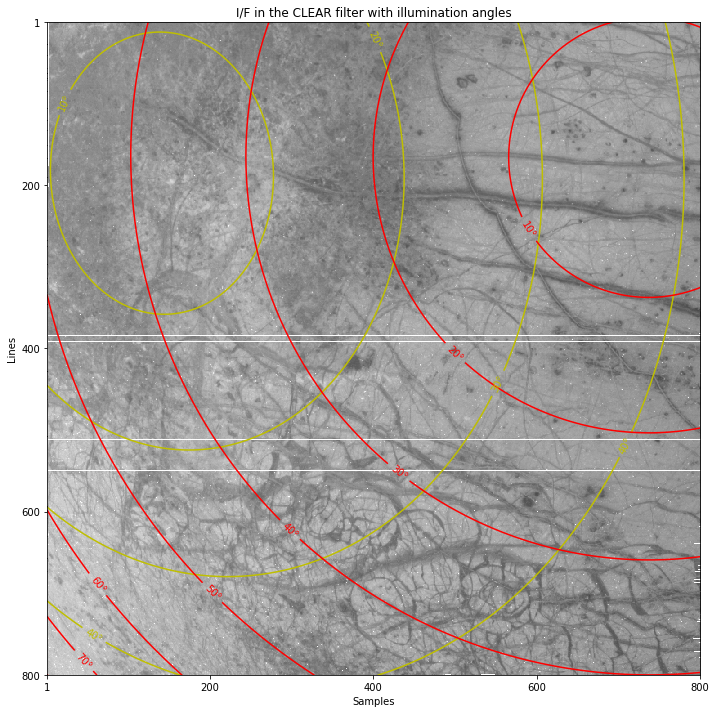

In [15]:
# Plot illumination angles
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

ax.imshow(img.data, extent=img.extent, cmap='gray', vmin=0, vmax=1)
cinc = ax.contour(img.inc, np.arange(0, 50, 10), extent=img.cextent, colors='y')
ceme = ax.contour(img.emi, np.arange(0, 90, 10), extent=img.cextent, colors='r')

plt.clabel(cinc, inline=True, fmt='%.0f°')
plt.clabel(ceme, inline=True, fmt='%.0f°')

ax.set_title(f'I/F in the {img.filter_name} filter with illumination angles')

ax.set_xticks(img.sticks)
ax.set_yticks(img.lticks)

ax.set_xlabel(img.slabel)
ax.set_ylabel(img.llabel);